In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

In [35]:
from tensorflow.keras.optimizers import Adam
model=load_model(r"C:\Users\chari\Desktop\Age and Gender Detector\Age-Gender-Detector\age_gender_model.keras",compile=False)
model.compile(optimizer=Adam(),loss=["binary_crossentropy","mae"],metrics=["accuracy","mae"])

In [36]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 48, 48,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 48, 48,    │          0 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 48, 48,    │          0 │ dropout_6[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 24, 24,    │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 24, 24,    │          0 │ dropout_7[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 12, 12,    │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 12, 12,    │          0 │ dropout_8[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 6, 6, 128) │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 6, 6, 256) │          0 │ dropout_9[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 3, 3, 256) │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import cv2
img_path=r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\3_1_2_20161219212116151.jpg.chip.jpg"
img=image.load_img(img_path,target_size=(48,48))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [38]:
from tensorflow.keras.models import Model
layer_name='conv2d_7'
layer=model.get_layer(layer_name)
activation_model=Model(inputs=model.input,outputs=layer.output)
activations=activation_model.predict(img_array)
activations=activations[0]
num_feature_maps=activations.shape[-1]
activation_map_resized=cv2.resize(activations,(48,48))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


In [39]:
activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

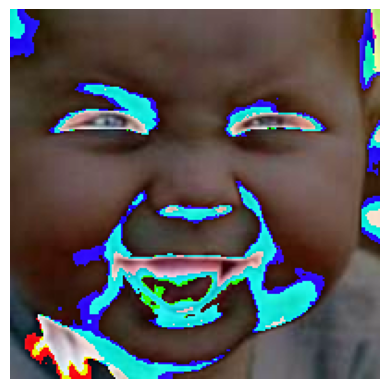

In [ ]:
#test image1
original_img=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\1_0_0_20161219200139603.jpg.chip.jpg")
activation_map=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\1_0_0_20161219200139603.jpg.chip.jpg")
original_img_float=original_img.astype(np.float32)
activation_map_float=activation_map.astype(np.float32)
weight_original=0.5
weight_activation_map=1.0
bias=0
img_overlay=cv2.addWeighted(original_img_float,weight_original,activation_map_float,weight_activation_map,bias)
img_overlay_uint8=img_overlay.astype(np.uint8)
plt.imshow(cv2.cvtColor(img_overlay_uint8,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

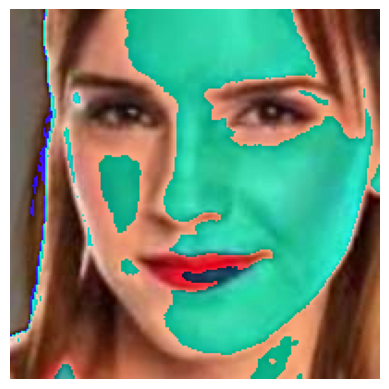

In [57]:
#test image2
original_img=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\23_1_0_20170117144945297.jpg.chip.jpg")
activation_map=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\23_1_0_20170117144945297.jpg.chip.jpg")
original_img_float=original_img.astype(np.float32)
activation_map_float=activation_map.astype(np.float32)
weight_original=0.5
weight_activation_map=1.0
bias=0
img_overlay=cv2.addWeighted(original_img_float,weight_original,activation_map_float,weight_activation_map,bias)
img_overlay_uint8=img_overlay.astype(np.uint8)
plt.imshow(cv2.cvtColor(img_overlay_uint8,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

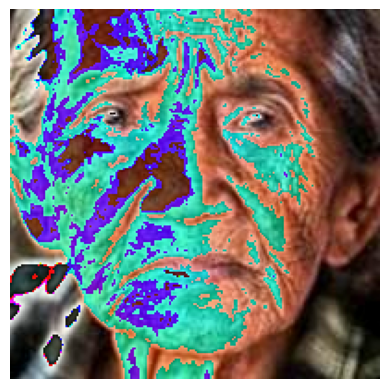

In [56]:
#test image3
original_img=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\99_1_2_20170117195405372.jpg.chip.jpg")
activation_map=cv2.imread(r"C:\Users\chari\Desktop\Age and Gender Detector\UTKFace\99_1_2_20170117195405372.jpg.chip.jpg")
original_img_float=original_img.astype(np.float32)
activation_map_float=activation_map.astype(np.float32)
weight_original=0.5
weight_activation_map=1.0
bias=0
img_overlay=cv2.addWeighted(original_img_float,weight_original,activation_map_float,weight_activation_map,bias)
img_overlay_uint8=img_overlay.astype(np.uint8)
plt.imshow(cv2.cvtColor(img_overlay_uint8,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()